In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn

from matplotlib import rcParams
dark2_colors=[(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]
rcParams['figure.figsize']=(10,6)
rcParams['figure.dpi']=150
rcParams['axes.prop_cycle']=mpl.cycler(color=dark2_colors)
rcParams['lines.linewidth']=2
rcParams['axes.facecolor']='white'
rcParams['font.size']=14
rcParams['patch.edgecolor']='white'
rcParams['patch.facecolor']=dark2_colors[0]
rcParams['font.family']='StixGeneral'


In [4]:
from sklearn.datasets import load_boston
boston=load_boston()

In [5]:
type(boston)

sklearn.utils.Bunch

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
boston.data.shape

(506, 13)

In [8]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [11]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [12]:
boston_df=pd.DataFrame(boston.data)
boston_df.head()

0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33

In [13]:
boston_df.columns=boston.feature_names
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [14]:
print(boston.target.shape)

(506,)


In [15]:
boston_df['PRICE']=boston.target
boston_df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [16]:
boston_df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

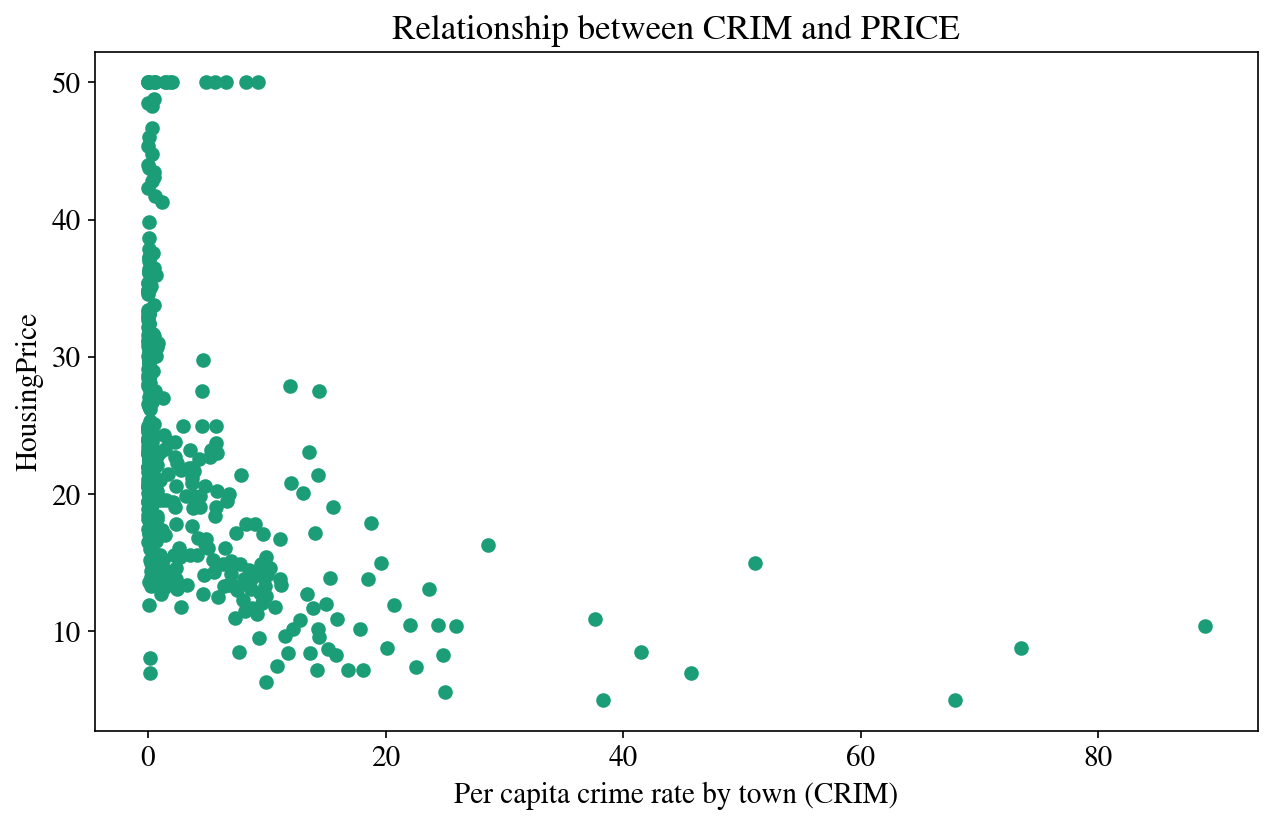

In [17]:
plt.scatter(boston_df.CRIM,boston_df.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("HousingPrice")
plt.title("Relationship between CRIM and PRICE");

In [18]:
plt.scatter(boston_df.RM,boston_df.PRICE)
plt.xlabel("Average number of rooms per dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and PRICE");

In [19]:
plt.scatter(boston_df.PTRATIO,boston_df.PRICE)
plt.xlabel("Pupil=to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and PRICE");

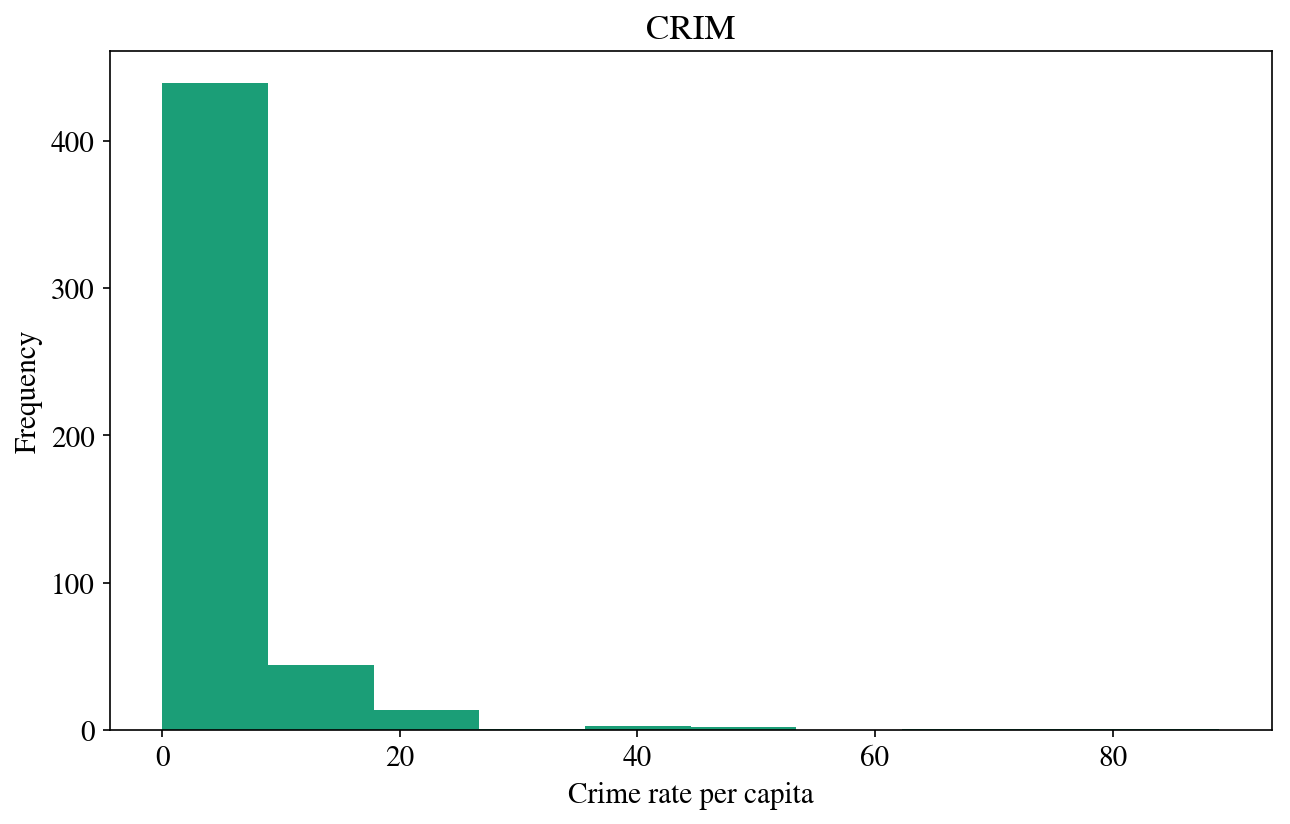

In [20]:
plt.hist(boston_df.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequency");

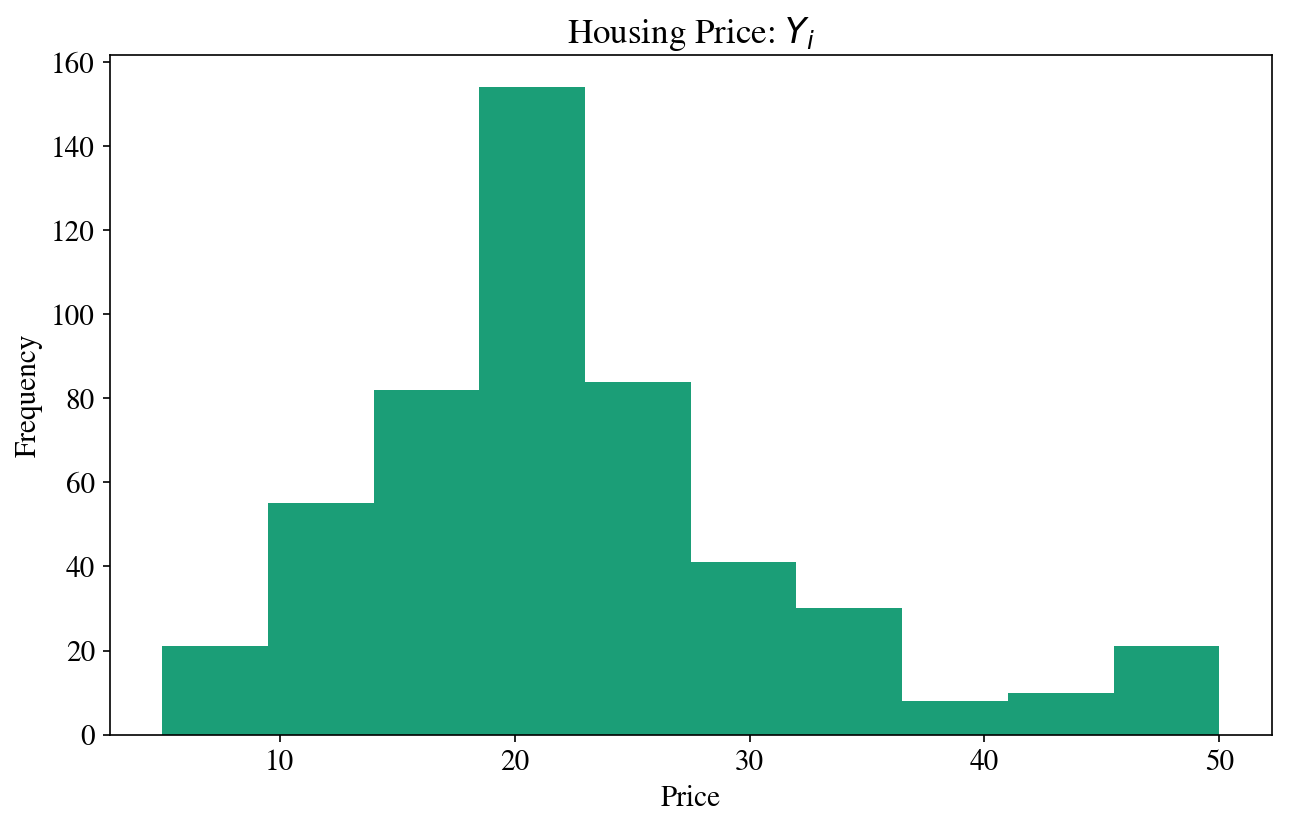

In [21]:
plt.hist(boston_df.PRICE)
plt.title('Housing Price: $Y_i$')
plt.xlabel('Price')
plt.ylabel('Frequency');

In [24]:
from sklearn.linear_model import LinearRegression
X=boston_df.drop('PRICE',axis=1)
Y=boston_df['PRICE']

In [25]:
lm=LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
lm.score(X,Y)

0.7406426641094095

In [40]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
lm.predict(X)

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423,
       25.25628446, 23.00180827, 19.53598843, 11.52363685, 18.92026211,
       18.99949651, 21.58679568, 20.90652153, 19.55290281, 19.28348205,
       19.29748321, 20.52750979, 16.91140135, 16.17801106, 18.40613603,
       12.52385753, 17.67103669, 15.83288129, 13.80628535, 15.67833832,
       13.38668561, 15.46397655, 14.70847428, 19.54737285, 20.8764282 ,
       11.45511759, 18.05923295,  8.81105736, 14.28275814, 13.70675891,
       23.81463526, 22.34193708, 23.10891142, 22.91502612, 31.35762569,
       34.21510225, 28.02056414, 25.20386628, 24.60979273, 22.94149176,
       22.09669817, 20.42320032, 18.03655088,  9.10655377, 17.20607751,
       21.28152535, 23.97222285, 27.6558508 , 24.04901809, 15.3618477 ,
       31.15264947, 24.85686978, 33.10919806, 21.77537987, 21.08493555,
       17.8725804 , 18.51110208, 23.98742856, 22.55408869, 23.37308644,
       30.36148358, 25.53056512, 21.11338564, 17.42153786, 20.78

In [46]:
lm.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [47]:
lm.intercept_

36.45948838509015

In [48]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
print('Estimated intercept coefficient:',lm.intercept_)

Estimated intercept coefficient: 36.45948838509015


In [50]:
print('Number of coefficient:',len(lm.coef_))

Number of coefficient: 13


In [53]:
coeffs=list(map(list,zip(X.columns,lm.coef_)))
pd.DataFrame(coeffs,columns=['features','estimatedCoefficients'])

features  estimatedCoefficients
0      CRIM              -0.108011
1        ZN               0.046420
2     INDUS               0.020559
3      CHAS               2.686734
4       NOX             -17.766611
5        RM               3.809865
6       AGE               0.000692
7       DIS              -1.475567
8       RAD               0.306049
9       TAX              -0.012335
10  PTRATIO              -0.952747
11        B               0.009312
12    LSTAT              -0.524758

In [54]:
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

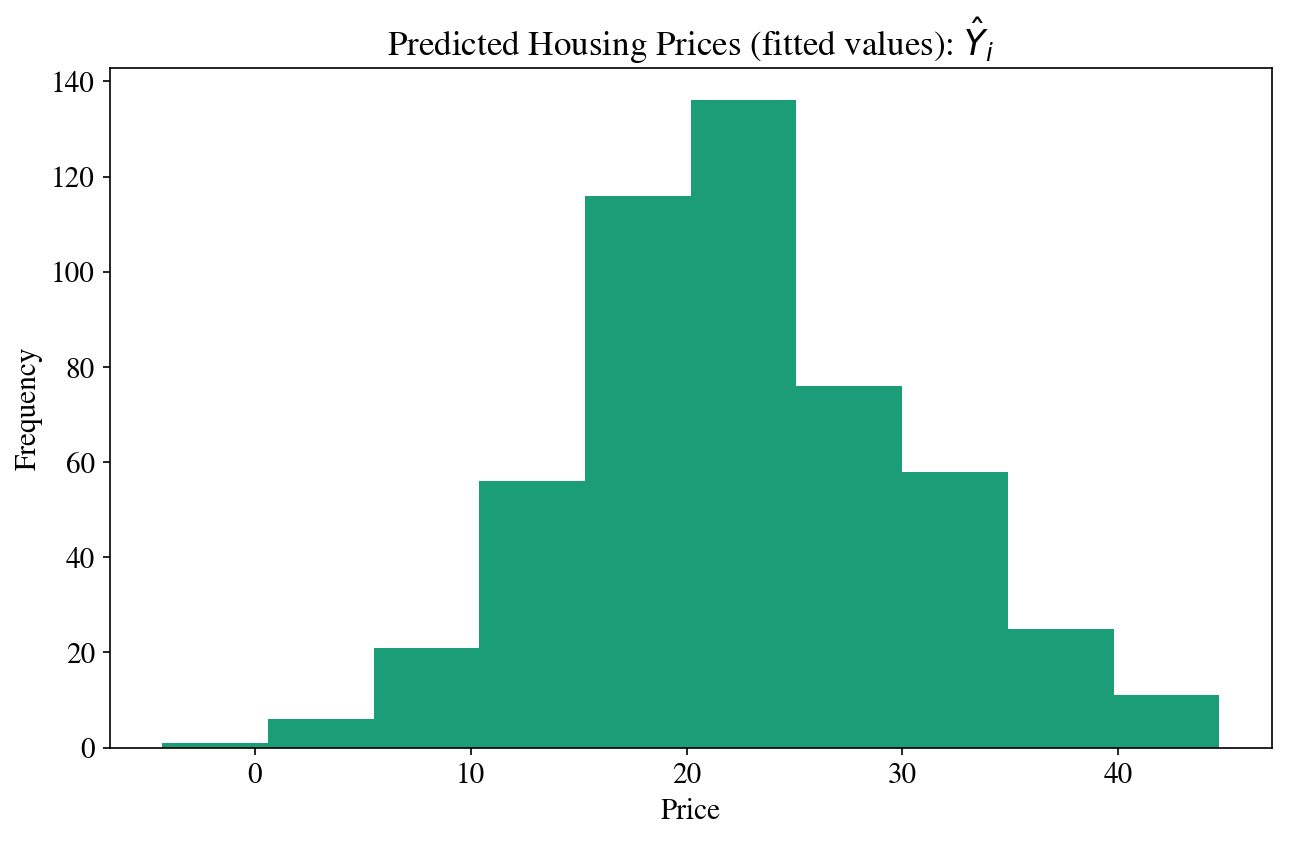

In [55]:
plt.hist(lm.predict(X))
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$')
plt.xlabel('Price')
plt.ylabel('Frequency');

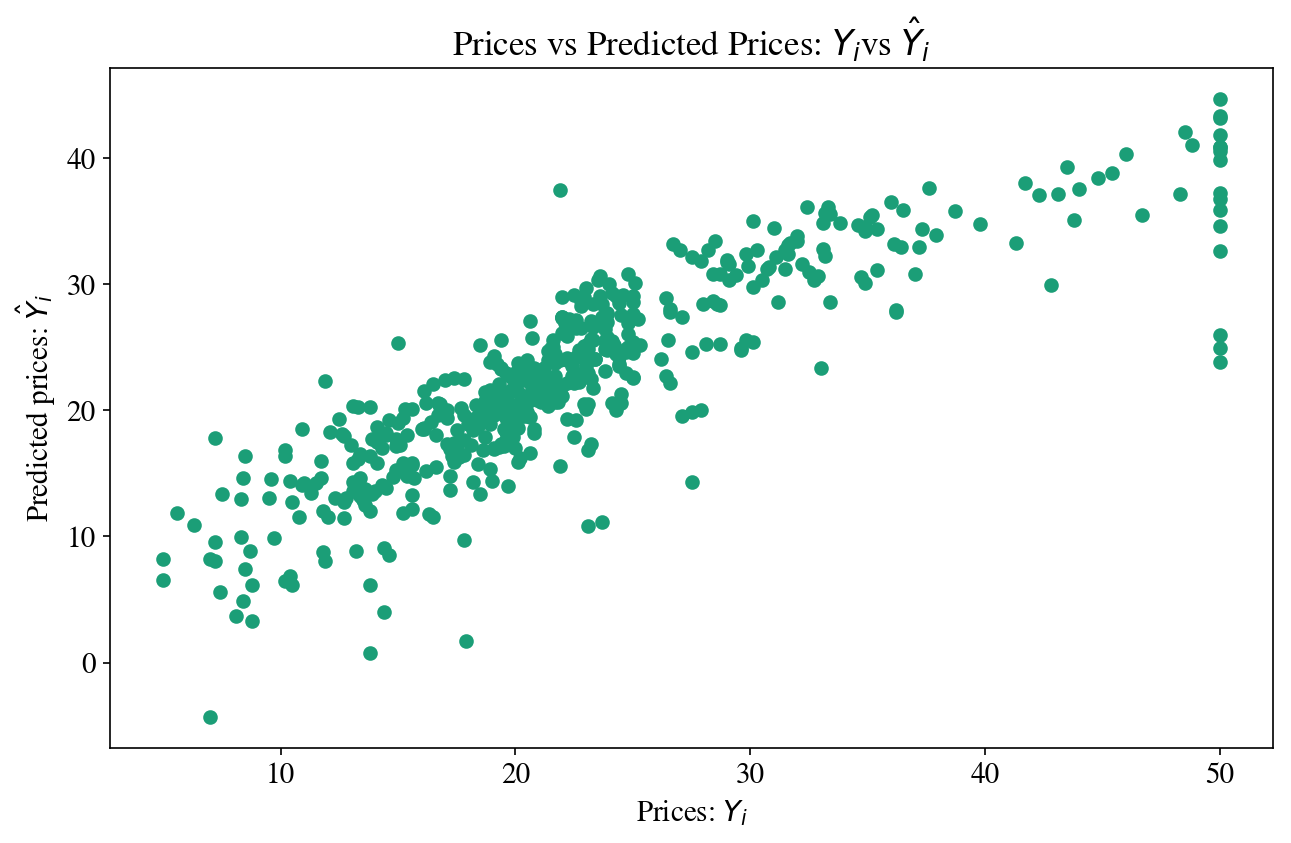

In [57]:
plt.scatter(boston_df.PRICE,lm.predict(X))
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$vs $\hat{Y}_i$");

In [59]:
np.sum((boston_df.PRICE - lm.predict(X)) ** 2)

11078.784577954977

In [60]:
lm=LinearRegression()
lm.fit(X[['PTRATIO']],boston_df.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [61]:
np.mean((boston_df.PRICE - lm.predict(X[['PTRATIO']]))**2)

62.65220001376927

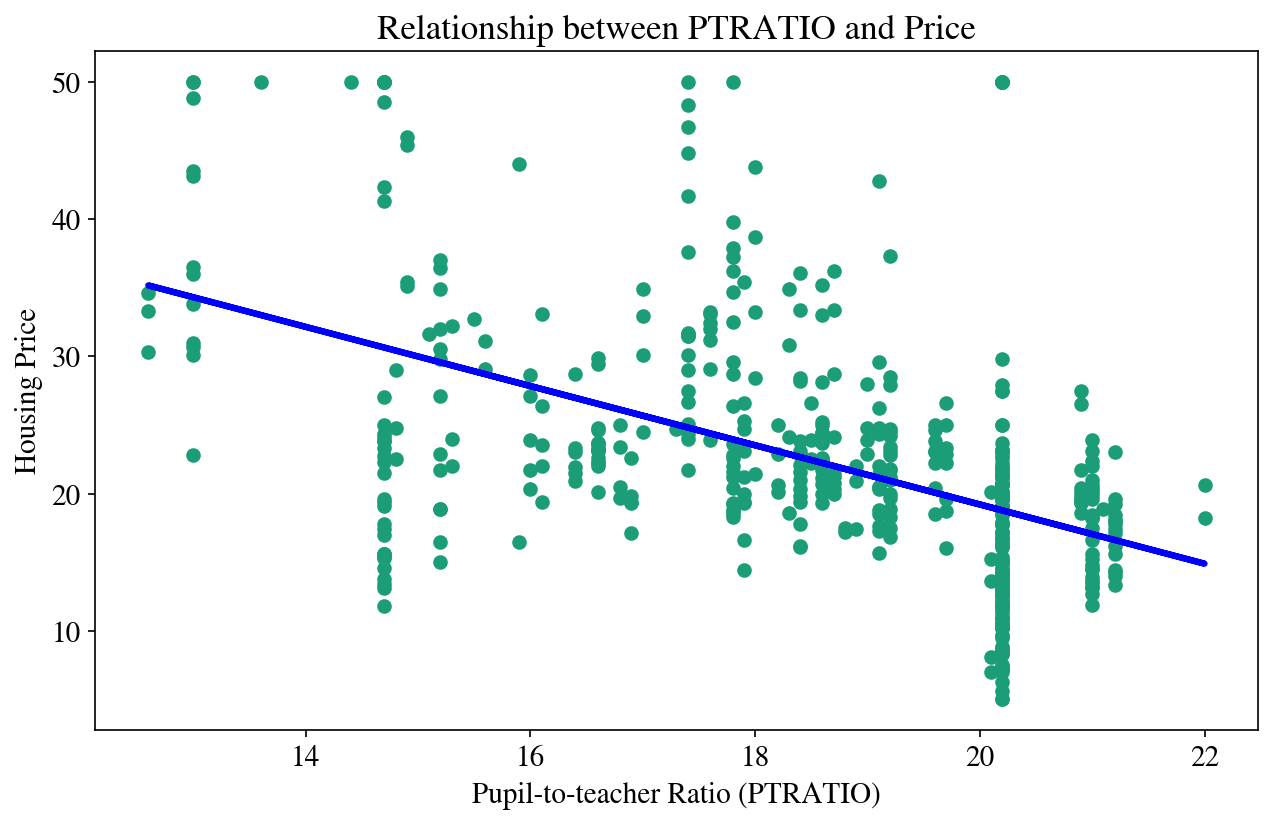

In [62]:
plt.scatter(boston_df.PTRATIO,boston_df.PRICE)
plt.xlabel("Pupil-to-teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")
plt.plot(boston_df.PTRATIO,lm.predict(X[['PTRATIO']]),color='blue',linewidth=3)

In [72]:
boston_newdf=pd.DataFrame(boston.data)
boston_newdf.columns=boston.feature_names
boston_newdf['PRICE']=boston.target
boston_newdf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [75]:
from sklearn.linear_model import LinearRegression
X = boston_newdf.drop(["PRICE","ZN","INDUS","CHAS","NOX","AGE","DIS","RAD","TAX","B","LSTAT"], axis = 1)
Y = boston_newdf['PRICE']

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [80]:
X

CRIM     RM  PTRATIO
0     0.00632  6.575     15.3
1     0.02731  6.421     17.8
2     0.02729  7.185     17.8
3     0.03237  6.998     18.7
4     0.06905  7.147     18.7
5     0.02985  6.430     18.7
6     0.08829  6.012     15.2
7     0.14455  6.172     15.2
8     0.21124  5.631     15.2
9     0.17004  6.004     15.2
10    0.22489  6.377     15.2
11    0.11747  6.009     15.2
12    0.09378  5.889     15.2
13    0.62976  5.949     21.0
14    0.63796  6.096     21.0
15    0.62739  5.834     21.0
16    1.05393  5.935     21.0
17    0.78420  5.990     21.0
18    0.80271  5.456     21.0
19    0.72580  5.727     21.0
20    1.25179  5.570     21.0
21    0.85204  5.965     21.0
22    1.23247  6.142     21.0
23    0.98843  5.813     21.0
24    0.75026  5.924     21.0
25    0.84054  5.599     21.0
26    0.67191  5.813     21.0
27    0.95577  6.047     21.0
28    0.77299  6.495     21.0
29    1.00245  6.674     21.0
..        ...    ...      ...
476   4.87141  6.484     20.2
477  15.02340  5.304     20.2
478  10.23300  6.185     20.2
479  14.33370  6.229     20.2
480   5.82401  6.242     20.2
481   5.70818  6.750     20.2
482   5.73116  7.061     20.2
483   2.81838  5.762     20.2
484   2.37857  5.871     20.2
485   3.67367  6.312     20.2
486   5.69175  6.114     20.2
487   4.83567  5.905     20.2
488   0.15086  5.454     20.1
489   0.18337  5.414     20.1
490   0.20746  5.093     20.1
491   0.10574  5.983     20.1
492   0.11132  5.983     20.1
493   0.17331  5.707     19.2
494   0.27957  5.926     19.2
495   0.17899  5.670     19.2
496   0.28960  5.390     19.2
497   0.26838  5.794     19.2
498   0.23912  6.019     19.2
499   0.17783  5.569     19.2
500   0.22438  6.027     19.2
501   0.06263  6.593     21.0
502   0.04527  6.120     21.0
503   0.06076  6.976     21.0
504   0.10959  6.794     21.0
505   0.04741  6.030     21.0

[506 rows x 3 columns]

In [81]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [82]:
lm=LinearRegression()
lm.fit(X[['CRIM','RM','PTRATIO']],boston_newdf.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [83]:
np.mean((boston_newdf.PRICE - lm.predict(X[['CRIM','RM','PTRATIO']]))**2)

34.24552790529692

In [84]:
X_train=X[:-50]
X_test=X[-50:]
Y_train=boston_df.PRICE[:-50]
Y_test=boston_df.PRICE[-50:]
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape);

(456, 3)
(50, 3)
(456,)
(50,)


In [85]:
X_train,X_test,Y_train,Y_test=sklearn.model_selection.train_test_split(
X,boston_df.PRICE,test_size=0.33,random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 3)
(167, 3)
(339,)
(167,)


In [86]:
lm=LinearRegression()
lm.fit(X_train,Y_train)
pred_train=lm.predict(X_train)
pred_test=lm.predict(X_test)


In [88]:
print("Fit a model X_train,and calculate MSE with Y_train:", np.mean((Y_train-lm.predict(X_train))**2))
print("Fit a model X_train, and calculate MSE with X_test,Y_test:",np.mean((Y_test-lm.predict(X_test))**2))

Fit a model X_train,and calculate MSE with Y_train: 30.057131214199956
Fit a model X_train, and calculate MSE with X_test,Y_test: 43.5714705608247


In [89]:
plt.scatter(lm.predict(X_train),lm.predict(X_train)-Y_train,c='b',s=40,alpha=0.5)
plt.scatter(lm.predict(X_test),lm.predict(X_test)-Y_test,c='g',s=40)
plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residual');